In [3]:
import os

data_dir = '../data/paper_final_results'
os.listdir(data_dir)

Autosave disabled


['accuracy_seeds', 'arch2vec_orig_seeds', 'baselines', 'info-nas_seeds']

In [4]:
def process_one_run(file):
    with open(file, 'rb') as f:
        res = json.load(f)
        
    res_df = pd.DataFrame(res)
    res_df['name'] = os.path.basename(file).replace('.json', '')
    basef = os.path.basename(file)
    basef = basef.replace('run_', '')
    
    num = ''
    for i in basef:
        try:
            int(i)
        except:
            break
        num += i
    res_df['seed'] = int(num)
    
    return res_df

In [5]:
seed = 3

runs = {
    'Accuracy 2': ('accuracy', 'orig'),
    'Accuracy 1': ('accuracy', 'dense'),
    'IO Model 2': ('info-nas', 'orig'),
    'IO Model 1': ('info-nas', 'dense'),
    'arch2vec': ('info-nas', 'ref'),
    'arch2vec original': ('arch2vec_orig', 'original')
}

In [ ]:
import glob
import json
import pandas as pd

train_time_sum = 138070.05435689294

def get_runs(name, pathnames, nb_time=None):
    seed_it = seed if name != 'arch2vec original' else 1
    runs_dir = os.path.join(data_dir, f"{pathnames[0]}_seeds", f"seed_{seed_it}", "reinforce-runs")
    runs_paths = glob.glob(os.path.join(runs_dir, f'run_*{pathnames[1]}*.json'))
    print(runs_dir)
    run_dfs = [process_one_run(f) for f in runs_paths]
    
    run_dfs = pd.concat(run_dfs, axis=0, ignore_index=True)
    run_dfs['algo'] = name
    run_dfs['runtime_shifted'] = run_dfs['runtime']
    if nb_time is not None:
        run_dfs['runtime_shifted'] += nb_time
    return run_dfs
    
res_dfs = []
for n, p in runs.items():
    res_dfs.append(get_runs(n, p, nb_time=train_time_sum if 'arch2vec' not in n else None))

In [7]:
plot_dfs = pd.concat(res_dfs, axis=0, ignore_index=True)
plot_dfs

,regret_validation,regret_test,runtime,name,seed,algo,runtime_shifted
0,0.577290,0.567341,1.758860e+03,run_100_embedding_model_orig_epoch-9,100,Accuracy 2,1.398289e+05
1,0.341713,0.335370,2.995084e+03,run_100_embedding_model_orig_epoch-9,100,Accuracy 2,1.410651e+05
2,0.025474,0.024573,5.645315e+03,run_100_embedding_model_orig_epoch-9,100,Accuracy 2,1.437154e+05
3,0.025474,0.024573,9.051399e+03,run_100_embedding_model_orig_epoch-9,100,Accuracy 2,1.471215e+05
4,0.025474,0.024573,1.147896e+04,run_100_embedding_model_orig_epoch-9,100,Accuracy 2,1.495490e+05
...,...,...,...,...,...,...,...
370583,0.000000,0.000835,1.492149e+06,run_9_features-original_training_arch2vec_epoc...,9,arch2vec original,1.492149e+06
370584,0.000000,0.000835,1.494815e+06,run_9_features-original_training_arch2vec_epoc...,9,arch2vec original,1.494815e+06
370585,0.000000,0.000835,1.497876e+06,run_9_features-original_training_arch2vec_epoc...,9,arch2vec original,1.497876e+06
370586,0.000000,0.000835,1.498843e+06,run_9_features-original_training_arch2vec_epoc...,9,arch2vec original,1.498843e+06


In [8]:
plot_dfs = plot_dfs.sort_values('algo')

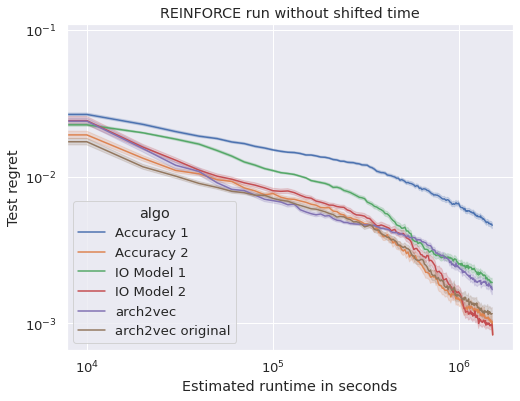

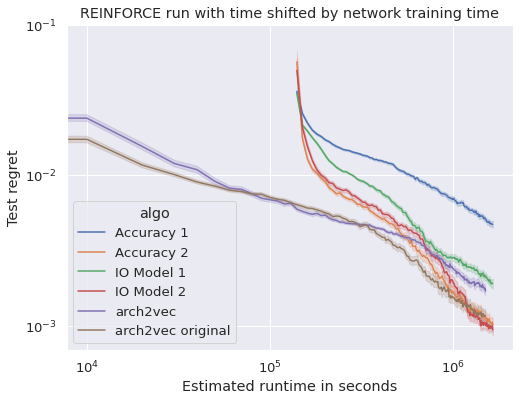

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

save_dir = '.'

plot_dfs['rounded_runtime'] = plot_dfs['runtime'].round(decimals=-4)
plot_dfs['rounded_runtime_shifted'] = plot_dfs['runtime_shifted'].round(decimals=-4)

plt.figure(figsize=(8,6))
sns.lineplot(data=plot_dfs, x='rounded_runtime', y='regret_test', hue='algo')
plt.xscale('log')
plt.yscale('log')
plt.title('REINFORCE run without shifted time')
plt.xlabel('Estimated runtime in seconds')
plt.ylabel('Test regret')
plt.savefig(f"{save_dir}/reinf.png")
plt.show()

plt.figure(figsize=(8,6))
sns.lineplot(data=plot_dfs, x='rounded_runtime_shifted', y='regret_test', hue='algo')
plt.xscale('log')
plt.yscale('log')
plt.title('REINFORCE run with time shifted by network training time')
plt.xlabel('Estimated runtime in seconds')
plt.ylabel('Test regret')
plt.savefig(f"{save_dir}/reinf_shifted.png")
plt.show()

In [89]:
plot_dfs[['algo', 'regret_test']].groupby('algo').min()

,regret_test
algo,
IO_flatten,0.000835
IO_orig,0.000000
accuracy_flatten,0.000835
accuracy_orig,0.000835
arch2vec,0.000835


344
420
391
433
339
355


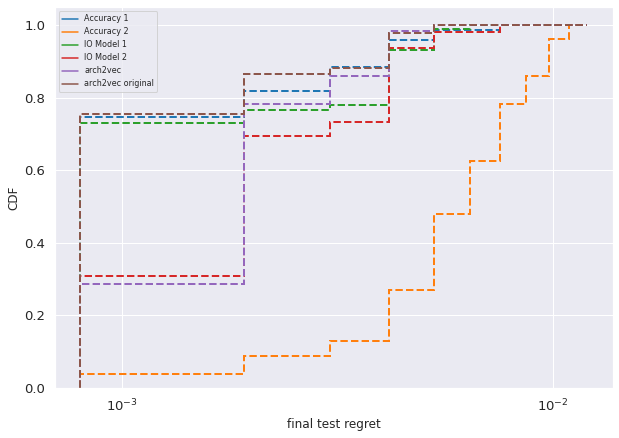

In [135]:
import matplotlib as mpl
from matplotlib.lines import Line2D


def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
    
cmap = plt.get_cmap("tab10")

for i, a in enumerate(plot_dfs['algo'].unique()):
    pdfs = plot_dfs[(plot_dfs['algo'] == a) & \
                    (plot_dfs['rounded_runtime_shifted'] == 1e6)]['regret_test'].to_list()
    print(len(pdfs))

    plt.hist(pdfs, bins=10, range=[8e-4, 1.2e-2], density=True,
             cumulative=True, histtype='step', linestyle='--', color=cmap(i), lw=2,
             label=a)

fix_hist_step_vertical_line_at_end(ax)


ax.set_xscale('log')
ax.set_xlabel('final test regret', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
ax.legend(prop={"size":8}, handles=new_handles, labels=labels, loc='upper left')


plt.show()